<a href="https://colab.research.google.com/github/Anuska013/Brain-Tumor-Classification-using-Neural-Network/blob/main/braintumor02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import pandas as pd # a tool for data analysis
import numpy as np #
import matplotlib.pyplot as plt #library to create static, animated and interactive visualization
import seaborn as sns #to make graphs
import plotly.express as px

In [25]:
from google.colab import files
files.upload()

Saving kaggle-4.json to kaggle-4 (1).json


{'kaggle-4 (1).json': b'{"username":"anuskapokharel","key":"5355dd37dec7731dd192b19db940a109"}'}

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle-4.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [27]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 123M/149M [00:00<00:00, 1.28GB/s]
100% 149M/149M [00:00<00:00, 1.13GB/s]


In [28]:
def get_class_paths(path):
  classes = []
  class_paths = []

   #Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #check if it's a directory
    if os.path.isdir(label_path):
      #Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

   #create a dataframe with the collected data
    df = pd.DataFrame({
       'Class Path': class_paths,
       'Class': classes
   })

  return df


In [29]:
tr_df = get_class_paths('/content/Training')
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1189.jpg,notumor
1,/content/Training/notumor/Tr-no_0125.jpg,notumor
2,/content/Training/notumor/Tr-no_1030.jpg,notumor
3,/content/Training/notumor/Tr-no_0985.jpg,notumor
4,/content/Training/notumor/Tr-no_1374.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0288.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0568.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0323.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0308.jpg,pituitary


In [30]:
ts_df =  get_class_paths('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0057.jpg,notumor
1,/content/Testing/notumor/Te-no_0217.jpg,notumor
2,/content/Testing/notumor/Te-no_0324.jpg,notumor
3,/content/Testing/notumor/Te-no_0033.jpg,notumor
4,/content/Testing/notumor/Te-no_0337.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0257.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0151.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0141.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0144.jpg,pituitary


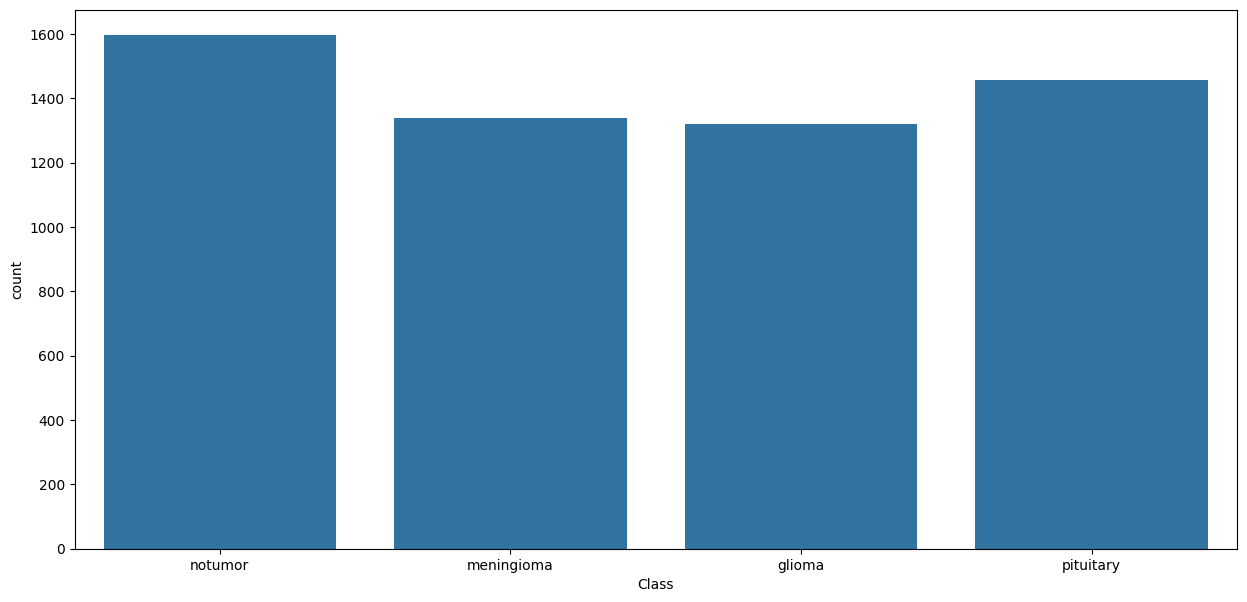

In [31]:
plt.figure(figsize =(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

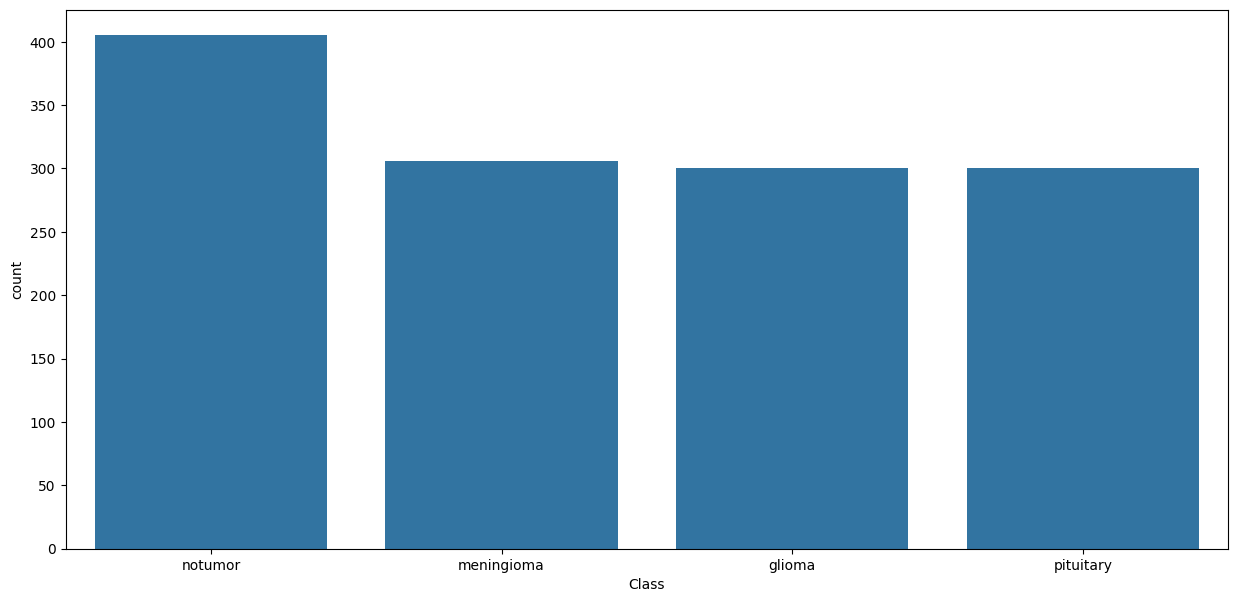

In [32]:
plt.figure(figsize =(15,7))
ax = sns.countplot(data=tr_df, x=ts_df['Class'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
valid_df, ts_df =train_test_split(ts_df, test_size=0.5,stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
711,/content/Testing/glioma/Te-gl_0225.jpg,glioma
697,/content/Testing/meningioma/Te-me_0054.jpg,meningioma
1201,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary
856,/content/Testing/glioma/Te-gl_0018.jpg,glioma
1089,/content/Testing/pituitary/Te-pi_0078.jpg,pituitary
...,...,...
642,/content/Testing/meningioma/Te-me_0041.jpg,meningioma
70,/content/Testing/notumor/Te-no_0359.jpg,notumor
211,/content/Testing/notumor/Te-no_0404.jpg,notumor
925,/content/Testing/glioma/Te-gl_0098.jpg,glioma


In [35]:
ts_df

,Class Path,Class
1210,/content/Testing/pituitary/Te-pi_0014.jpg,pituitary
1036,/content/Testing/pituitary/Te-pi_0159.jpg,pituitary
488,/content/Testing/meningioma/Te-me_0266.jpg,meningioma
1299,/content/Testing/pituitary/Te-pi_0189.jpg,pituitary
750,/content/Testing/glioma/Te-gl_0051.jpg,glioma
...,...,...
704,/content/Testing/meningioma/Te-me_0233.jpg,meningioma
789,/content/Testing/glioma/Te-gl_0129.jpg,glioma
856,/content/Testing/glioma/Te-gl_0037.jpg,glioma
278,/content/Testing/notumor/Te-no_0211.jpg,notumor


In [36]:
batch_size = 32
image_size= (299, 299)
#image data generator
image_generator = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1./255)

In [37]:
# Training generator
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,

)

# Validation generator
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,

)

# Test generator
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=image_size,
    shuffle=False  # do not shuffle test data
)

#for training and validation we use the same data
#we don't shuffle the testing data
#we are making it ready to feed it to our ML

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [38]:
tr_df = get_class_paths('/content/Training')
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1189.jpg,notumor
1,/content/Training/notumor/Tr-no_0125.jpg,notumor
2,/content/Training/notumor/Tr-no_1030.jpg,notumor
3,/content/Training/notumor/Tr-no_0985.jpg,notumor
4,/content/Training/notumor/Tr-no_1374.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0288.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0568.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0323.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0308.jpg,pituitary


In [39]:
ts_df =  get_class_paths('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0057.jpg,notumor
1,/content/Testing/notumor/Te-no_0217.jpg,notumor
2,/content/Testing/notumor/Te-no_0324.jpg,notumor
3,/content/Testing/notumor/Te-no_0033.jpg,notumor
4,/content/Testing/notumor/Te-no_0337.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0257.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0151.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0141.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0144.jpg,pituitary


In [40]:
valid_df, ts_df =train_test_split(ts_df, test_size=0.5,stratify=ts_df['Class'])

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (224, 224)  # match Xception input

# Define ImageDataGenerator for training and validation
image_generator = ImageDataGenerator(rescale=1./255)

# Training generator
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical'
)

# Validation generator
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical'
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
ts_gen = test_datagen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=image_size,
    class_mode='categorical',
    shuffle=False  # do not shuffle test data
)

#for training and validation we use the same data
#we don't shuffle the testing data
#we are making it ready to feed it to our ML

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


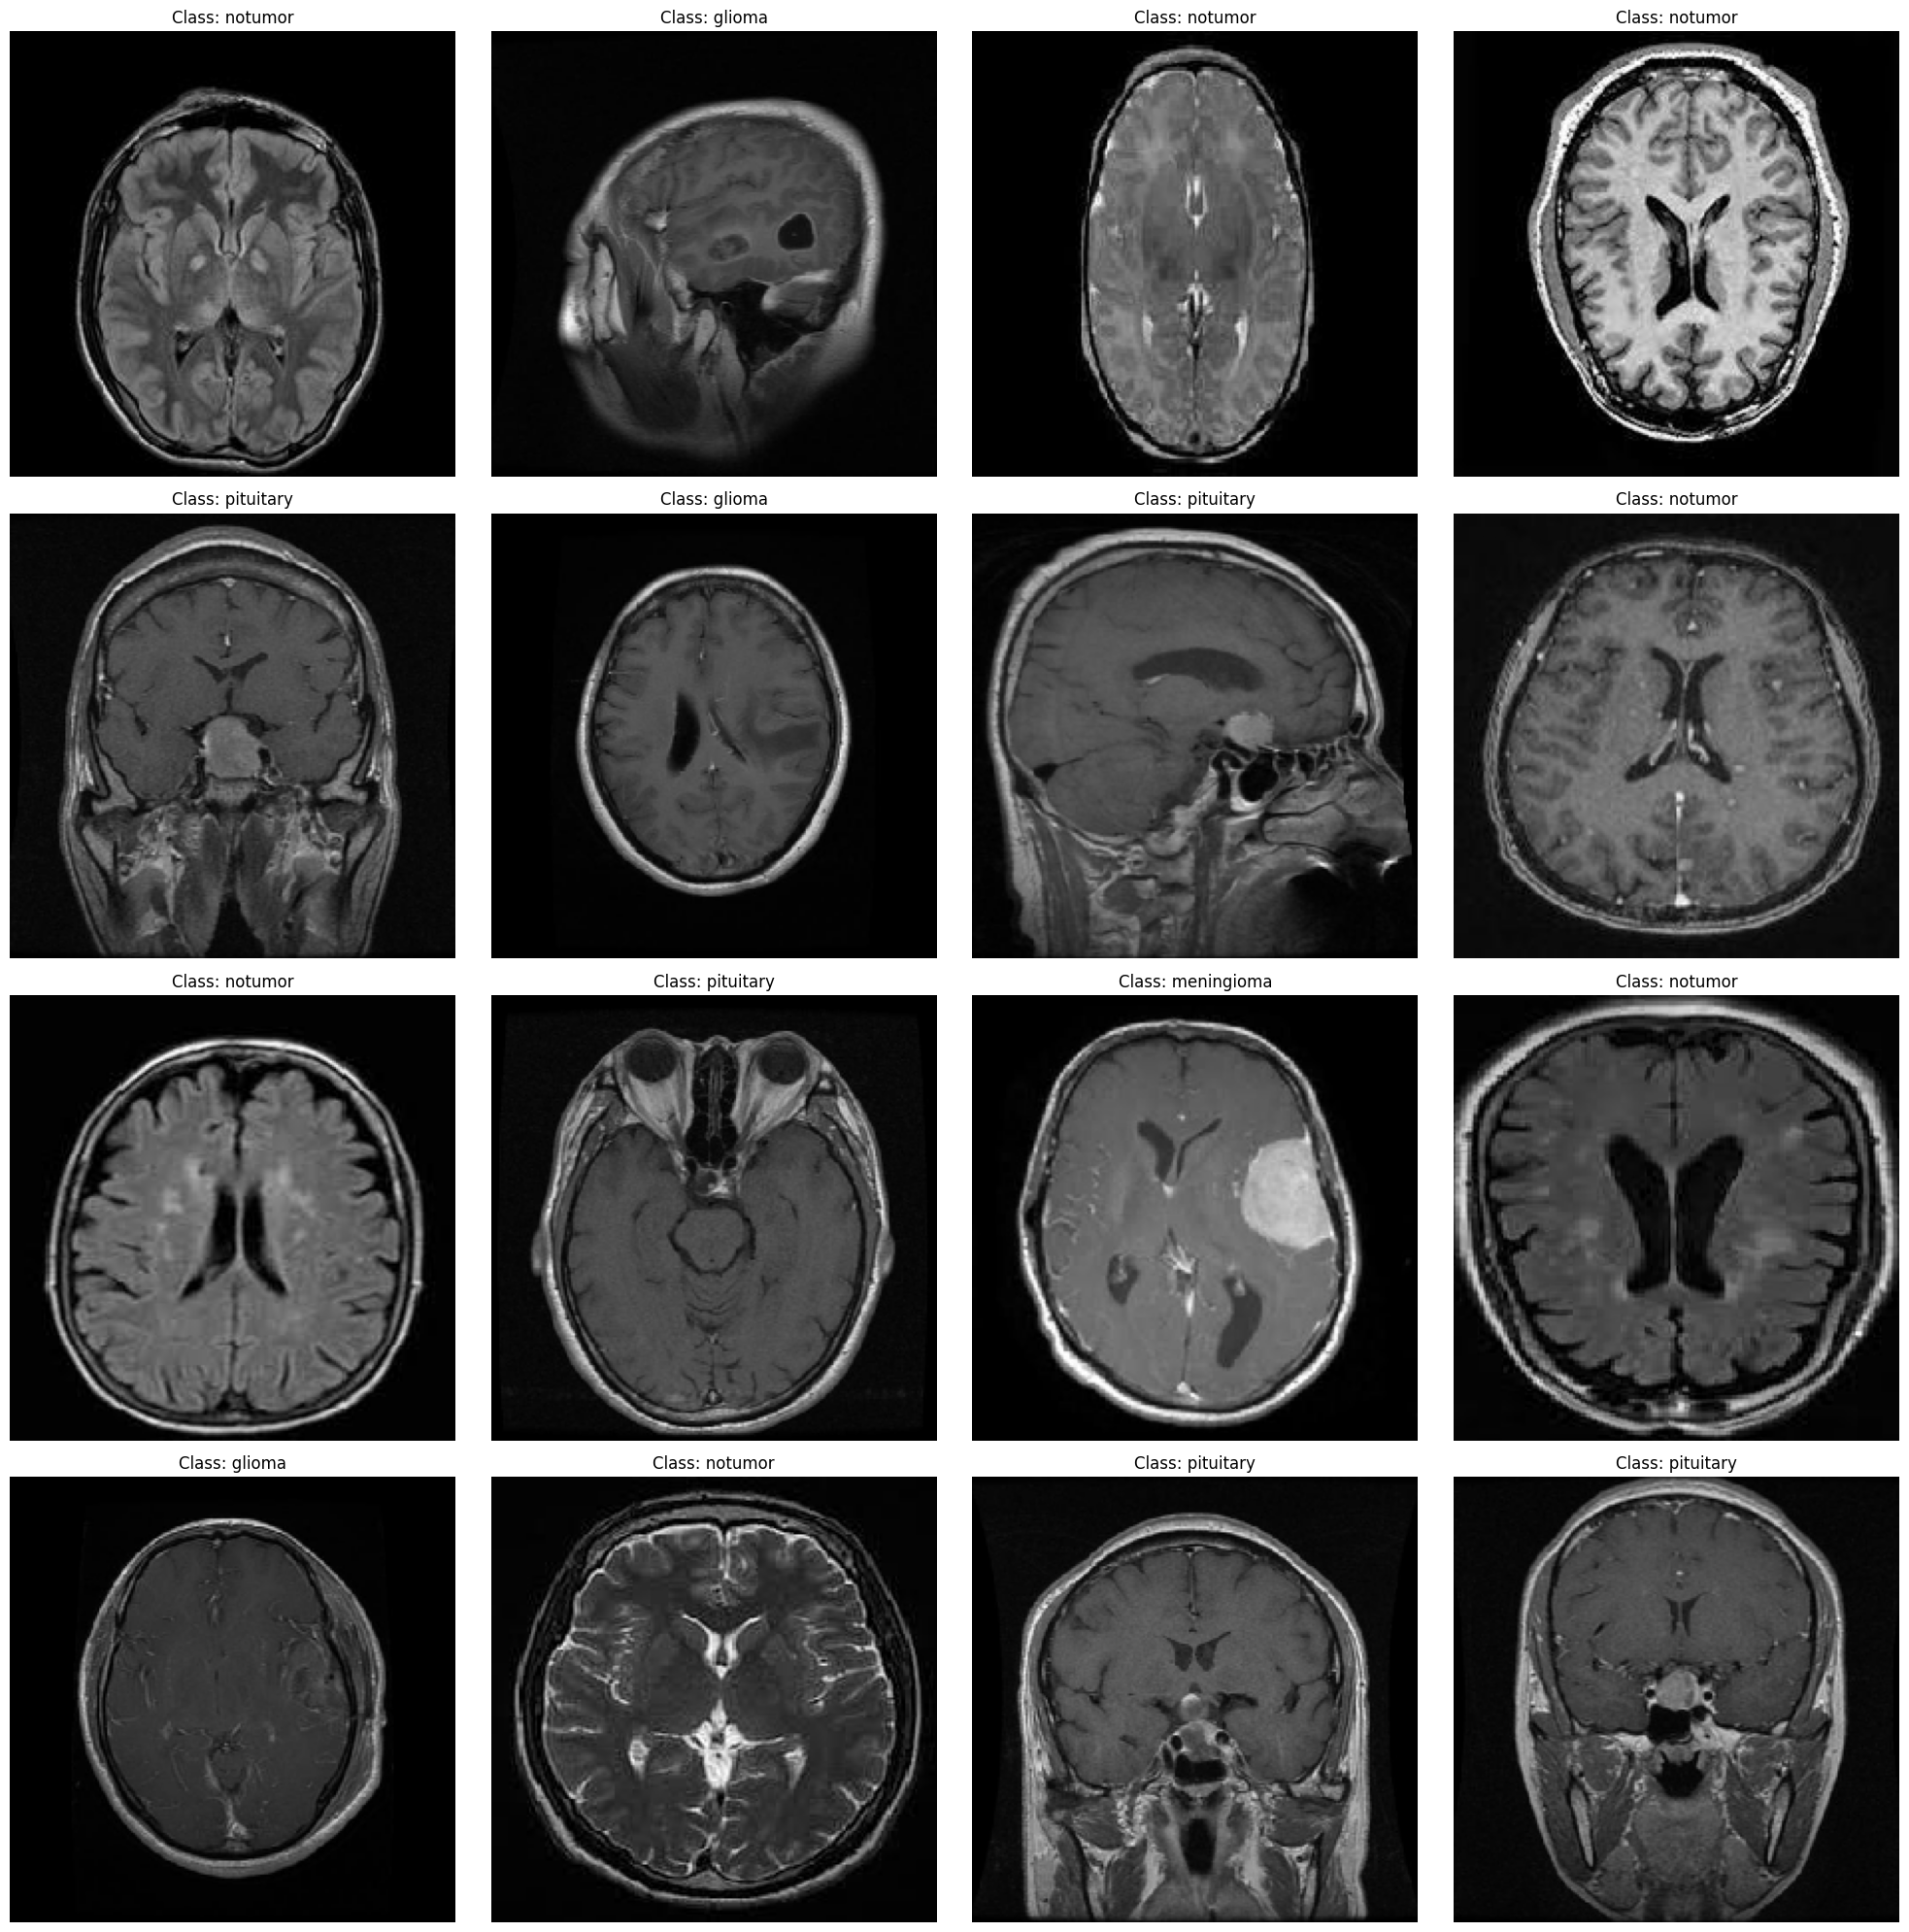

In [42]:
#let's view some data
#it's creating a 4,4 grid line
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label =batch[1][0]
  plt.imshow(image)

  #get the class index
  class_index = np.argmax(label)

  #get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys()) #makes a list of name for image
  class_indices = list(tr_gen.class_indices.values()) #makes a list of number for the image

  #get the class name for the class index
  index_position = class_indices.index(class_index)

  #get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
#xception - break down the image into smaller , easier-to-understand parts, and then looks at those parts one by one
#euta gadi cha vane teslai part by part herne ani bhujne ani sabai lai add garera last ma herne
#
img_shape = (299, 299, 3)
base_model = tf.keras.applications.Xception(input_shape=img_shape,
                                            include_top=False,
                                            weights='imagenet',
                                            pooling='max')#pooling means focuses on every images and used the image that standst

model = Sequential([
     base_model,
     Flatten(),
     Dense(128, activation='relu'),
     Dropout(rate=0.3),
     Dense(4, activation='softmax')
 ])


In [44]:
model.compile(Adamax(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()]) #helps to learn model better

In [45]:
#trainning our moduel
hist = model.fit(tr_gen,
                 epochs=3,#moduel will go over the data 5 times
                 validation_data=valid_gen)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "xception" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [46]:
# visualizing the metrics
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}


NameError: name 'hist' is not defined

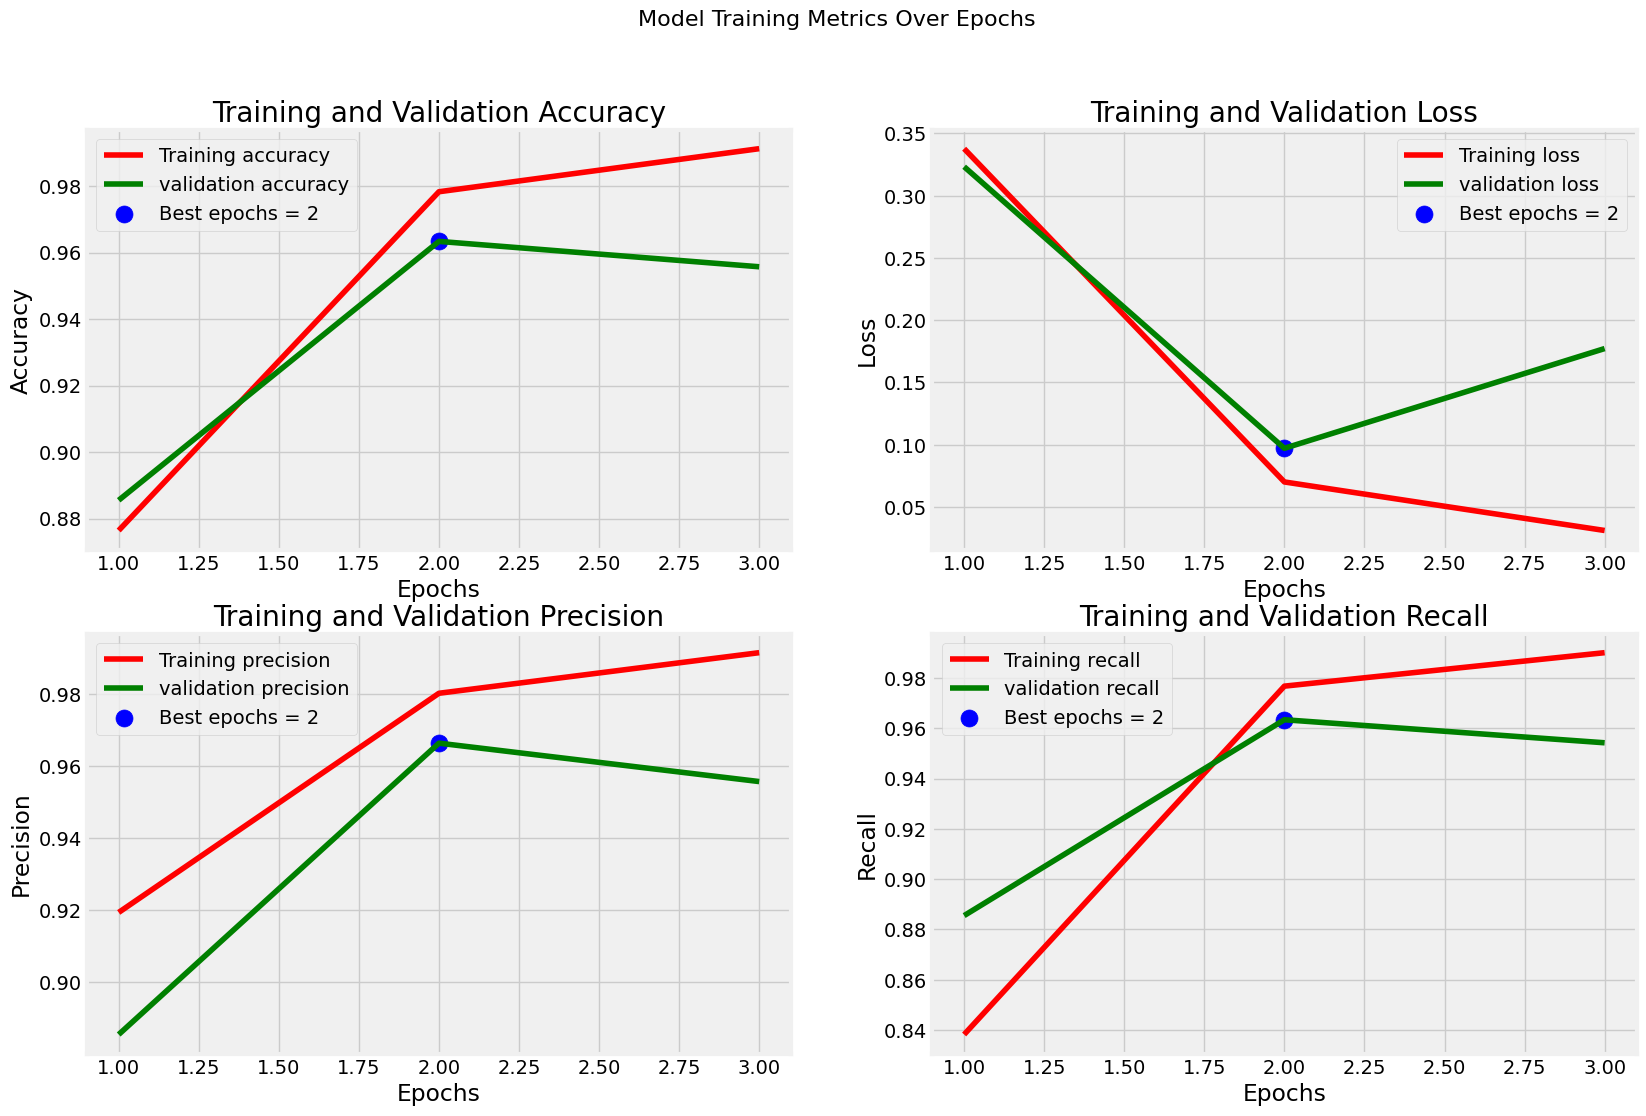

In [ ]:
#visualiziting the metrics
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m]= idx +1
  best_values[m]= val_metrics[m][idx]

#plot metrics
plt.figure(figsize =(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics ,1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)


  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label= f'Best epochs = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
#how well our moduel
train_score = model.evaluate(tr_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)

print(f'Training Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[1]:.4f}%')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}%')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Testing Accuracy: {test_score[1]*100:.2f}%')

179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 308ms/step - accuracy: 0.9541 - loss: 0.1436 - precision: 0.9556 - recall: 0.9525


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9642 - loss: 0.1327 - precision: 0.9682 - recall: 0.9628
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.9613 - loss: 0.1440 - precision: 0.9613 - recall: 0.9606
Training Accuracy: 95.64%
Train Loss: 0.9564%


Validation Accuracy: 95.57%
Validation Loss: 0.1772%


Test Accuracy: 94.97%
Testing Accuracy: 94.97%


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step


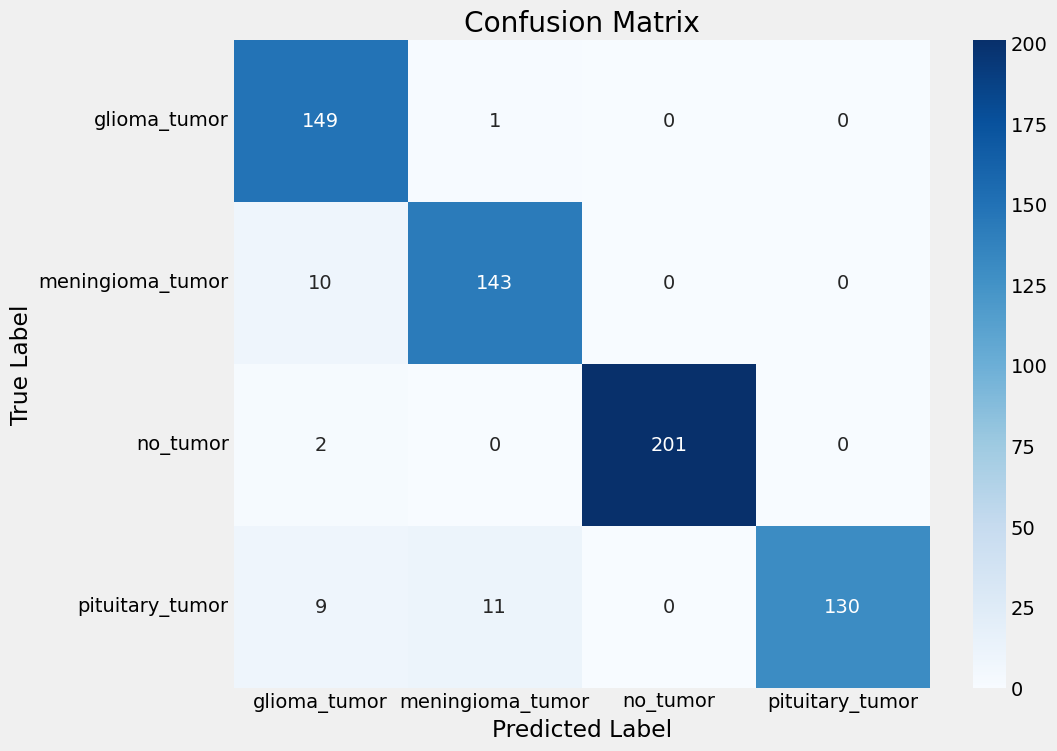

In [ ]:
#visualiziting how our modules work
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1) #asking our train datasets to make prediction
#argmax picks the class that it is most confident about

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

#then create and display the confusion matrix
#shows how many preciction were correct and what were wrong
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(image_path: str) -> None:
  #get class labels
  labels = list(class_dict.keys())

  #Create figure
  plt.figure(figsize=(6, 8))

  #load and preprocess image
  img = Image.open(image_path)
  resized_img = img.resize((224, 224)) # Updated image size to 224x224
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  #Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #plot prediction probabiloties
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  #Add probabilities
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor types: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


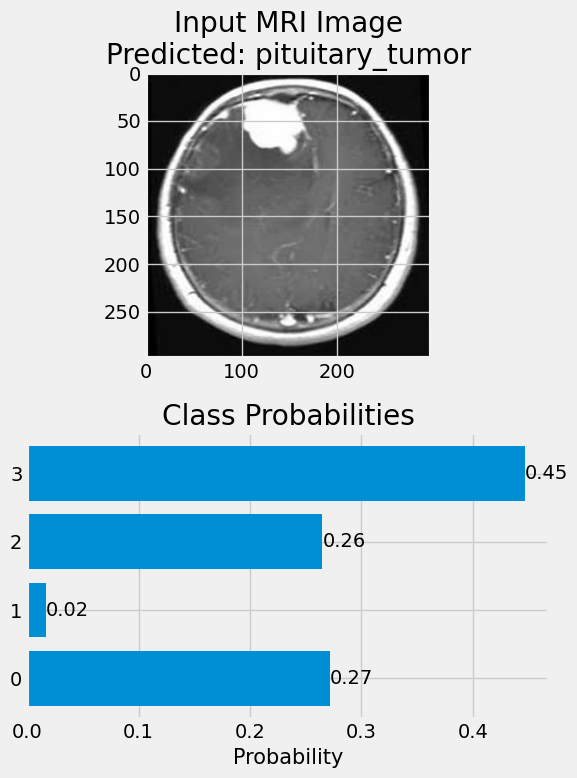


Predicted tumor types: pituitary_tumor


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0008.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


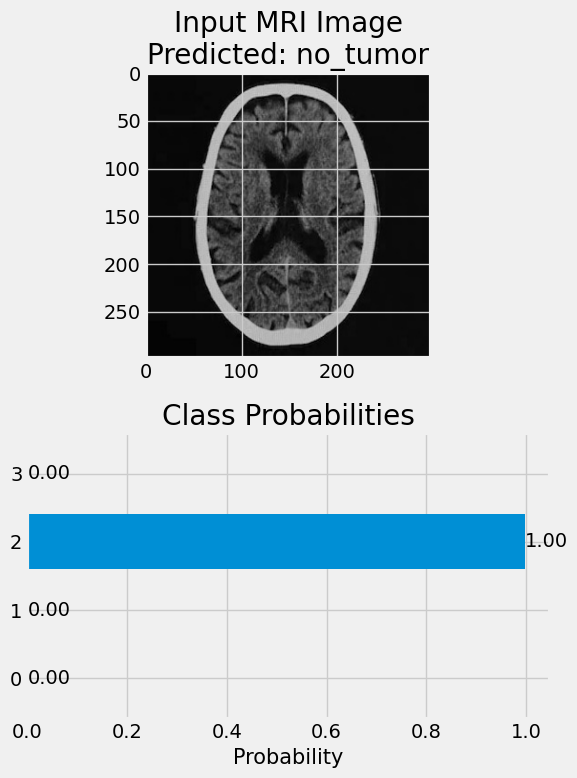


Predicted tumor types: no_tumor


In [ ]:
predict("/content/Testing/notumor/Te-noTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


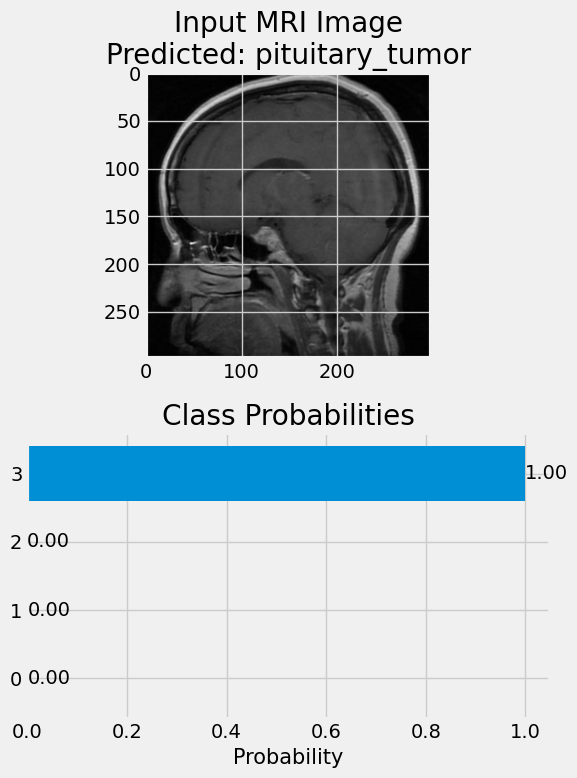


Predicted tumor types: pituitary_tumor


In [ ]:
predict("/content/Testing/pituitary/Te-piTr_0004.jpg")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Configure Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle-4.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

# Re-create dataframes if they don't exist
if 'tr_df' not in locals():
    def get_class_paths(path):
        classes = []
        class_paths = []
        for label in os.listdir(path):
            label_path = os.path.join(path, label)
            if os.path.isdir(label_path):
                for image in os.listdir(label_path):
                    image_path = os.path.join(label_path, image)
                    classes.append(label)
                    class_paths.append(image_path)
        df = pd.DataFrame({
           'Class Path': class_paths,
           'Class': classes
        })
        return df

    tr_df = get_class_paths('/content/Training')
    ts_df = get_class_paths('/content/Testing')
    valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])


batch_size = 16
image_size= (224, 224) #fewer images are trained
#image data generator
image_generator = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1./255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical' # Added class_mode
)

# Validation generator
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical' # Added class_mode
)

# Test generator
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=image_size,
    shuffle=False,  # do not shuffle test data
    class_mode='categorical' # Added class_mode
)

cp: cannot stat 'kaggle-4.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


FileNotFoundError: [Errno 2] No such file or directory: '/content/Training'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax # Import Adamax optimizer
from tensorflow.keras.metrics import Precision, Recall # Import Precision and Recall

#Create a Sequential model

cnn_model = Sequential()

#convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation ='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256,(3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the output for fully connected layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))


#Compile the model
cnn_model.compile(Adamax(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()]) #helps to learn model better

#Display the model summary
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen,
                 epochs=11,#moduel will go over the data 5 times
                 validation_data=valid_gen)

Epoch 1/11
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 592ms/step - accuracy: 0.8830 - loss: 0.5388 - precision_1: 0.8947 - recall_1: 0.8654 - val_accuracy: 0.8534 - val_loss: 0.5542 - val_precision_1: 0.8685 - val_recall_1: 0.8366
Epoch 2/11
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 592ms/step - accuracy: 0.8973 - loss: 0.4367 - precision_1: 0.9067 - recall_1: 0.8911 - val_accuracy: 0.8840 - val_loss: 0.4424 - val_precision_1: 0.9009 - val_recall_1: 0.8748
Epoch 3/11
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 591ms/step - accuracy: 0.9167 - loss: 0.3705 - precision_1: 0.9243 - recall_1: 0.9099 - val_accuracy: 0.9115 - val_loss: 0.3638 - val_precision_1: 0.9153 - val_recall_1: 0.9069
Epoch 4/11
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 592ms/step - accuracy: 0.9365 - loss: 0.3111 - precision_1: 0.9400 - recall_1: 0.9326 - val_accuracy: 0.9191 - val_loss: 0.3520 - val_precision_1: 0.9256 - val_recall_1: 0.9115
Epoch 5/11
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 593ms/step - accuracy: 0.9476 - loss: 0.2709 - precision_1: 0.9505 

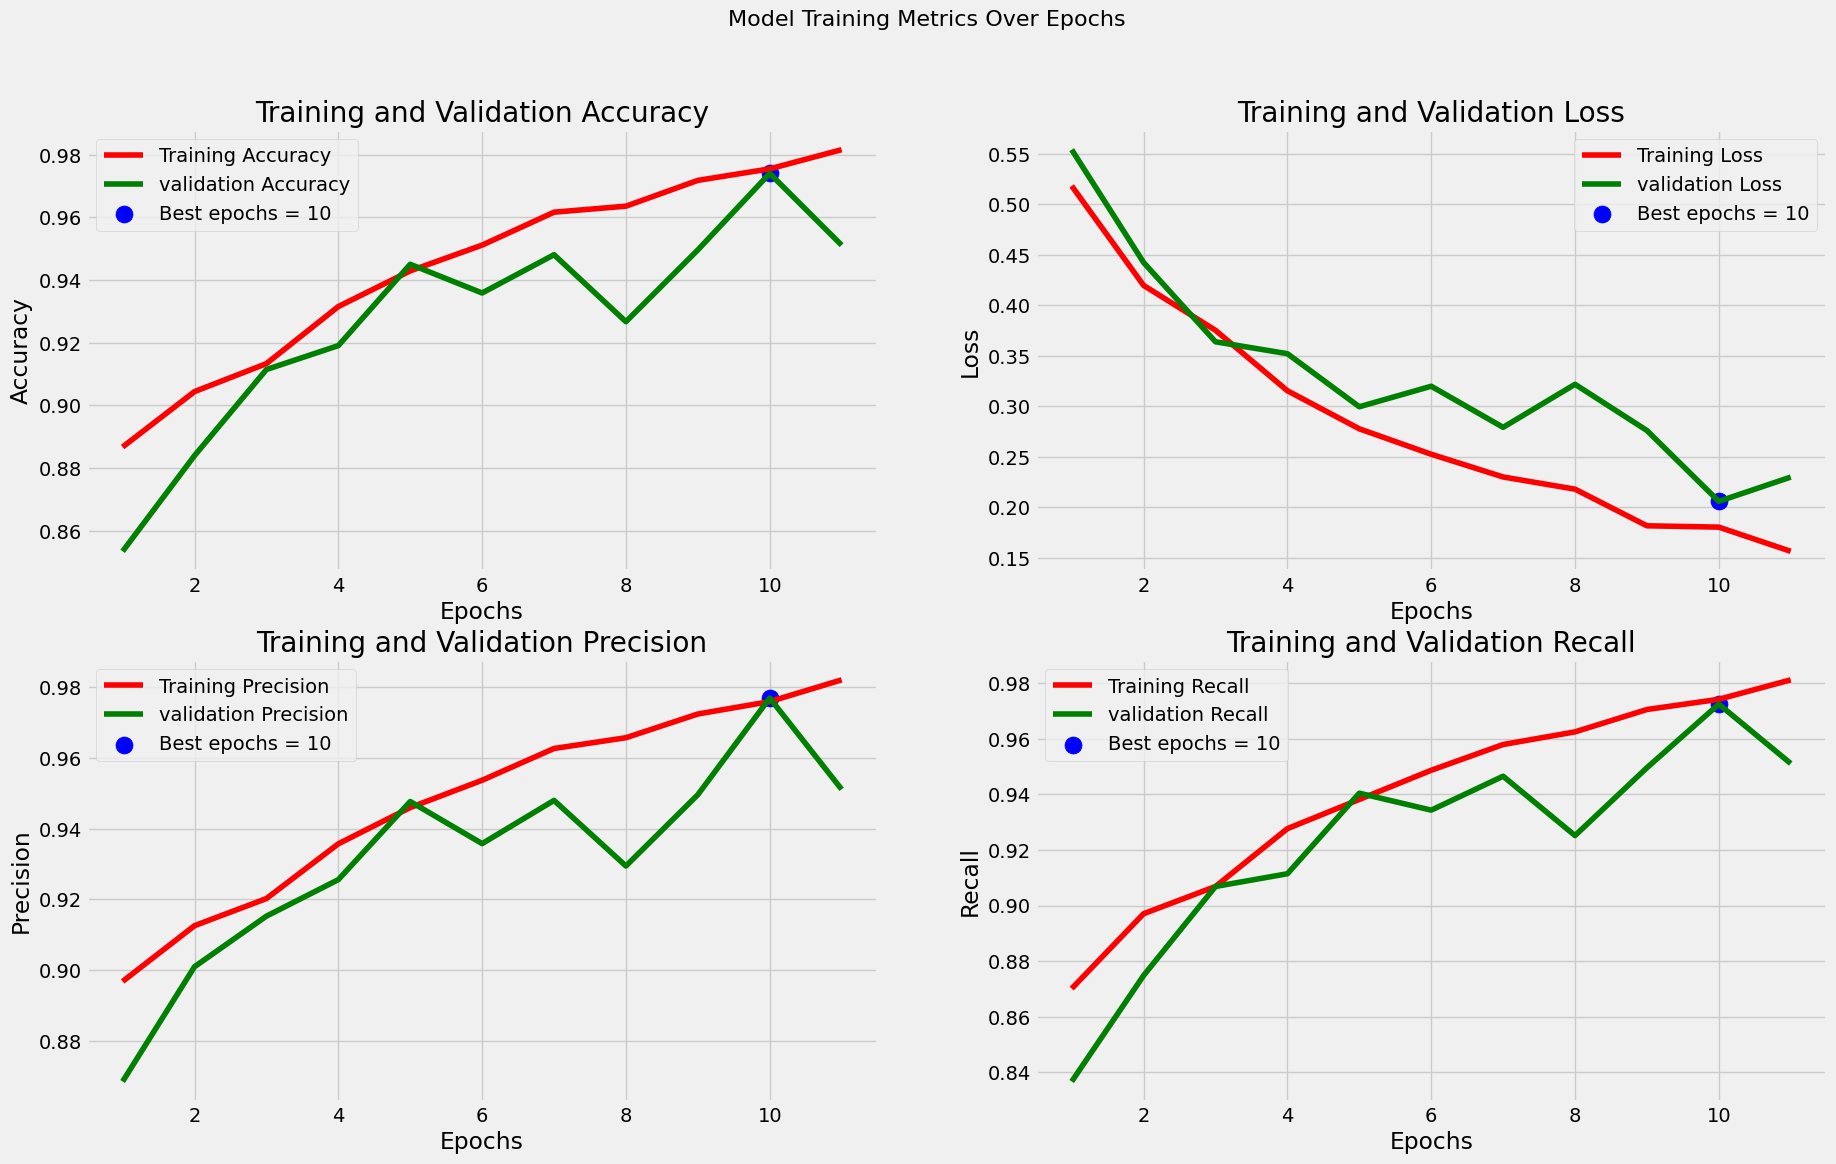

In [ ]:
metrics = ['accuracy','loss','precision_1','recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m]= idx +1
  best_values[m]= val_metrics[m][idx]

#plot metrics
plt.figure(figsize =(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics ,1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  # Corrected metric names for plotting labels
  plot_metric_name = metric.replace('_1', '').title()

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {plot_metric_name}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'validation {plot_metric_name}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label= f'Best epochs = {best_epochs[metric]}')

  plt.title(f'Training and Validation {plot_metric_name}')
  plt.xlabel('Epochs')
  plt.ylabel(plot_metric_name)
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)

print(f'Training Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[1]:.4f}%')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}%')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Testing Accuracy: {test_score[1]*100:.2f}%')

179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.9923 - loss: 0.1260 - precision_1: 0.9930 - recall_1: 0.9922
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9716 - loss: 0.2071 - precision_1: 0.9717 - recall_1: 0.9704
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9425 - loss: 0.2381 - precision_1: 0.9425 - recall_1: 0.9425
Training Accuracy: 99.37%
Train Loss: 0.9937%


Validation Accuracy: 95.11%
Validation Loss: 0.2298%


Test Accuracy: 97.10%
Testing Accuracy: 97.10%


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step


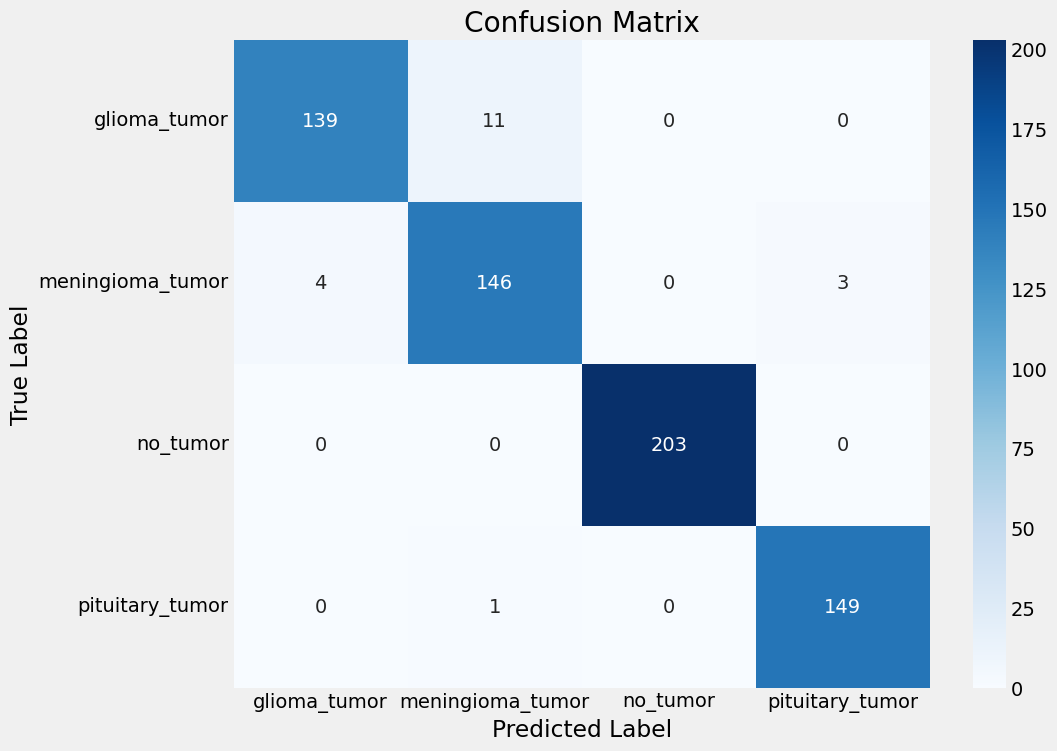

In [ ]:
#visualiziting how our modules work
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1) #asking our train datasets to make prediction
#argmax picks the class that it is most confident about

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

#then create and display the confusion matrix
#shows how many preciction were correct and what were wrong
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       150
           1       0.92      0.95      0.94       153
           2       1.00      1.00      1.00       203
           3       0.98      0.99      0.99       150

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
#trainned two deep learning modules in part 1

In [ ]:
#part 2

In [ ]:
cnn_model.save("cnn_model.h5")

In [ ]:
#Streamlit Web App

In [ ]:
! pip install streamlit pyngrok python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 149.0 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok #creats secret tunnle to local host
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():#tells streamlit using the API that we gave
  os.system('streamlit run /contebt/app.py --server.port 8501')

In [ ]:
!pip install streamlit==1.32.0 pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
import PIL.Image
import os
import cv2
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Create output directory for saliency maps
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# Saliency Map Function
# -----------------------------
def generate_saliency_map(model, img_array, class_index, img_size, original_img, filename):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    # Compute gradients
    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1).numpy().squeeze()

    # Resize gradients to match input size
    gradients = cv2.resize(gradients, img_size)

    # Create circular mask for brain area
    center = (gradients.shape[1] // 2, gradients.shape[0] // 2)
    radius = min(center) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask
    gradients = gradients * mask

    # Normalize brain area only
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Threshold and smooth
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose on original image
    original_img = np.array(original_img.resize(img_size))
    superimposed_img = (heatmap * 0.7 + original_img * 0.3).astype(np.uint8)

    # Save map
    saliency_map_path = os.path.join(output_dir, f"saliency_{filename}.png")
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

# -----------------------------
# Load Xception Model Function
# -----------------------------
def load_xception_model(model_path="xception_model.weights.h5"):
    """Default weights file in app folder"""
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(
        include_top=False,
        weights='imagenet',
        input_shape=img_shape,
        pooling='max'
    )

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    model.compile(
        optimizer=Adamax(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    # Load weights
    model.load_weights(model_path)
    return model

# -----------------------------
# Streamlit App
# -----------------------------
st.title("🧠 Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

# Only one uploader for MRI image
uploaded_file = st.file_uploader("Choose a brain MRI image...", type=['jpg', 'jpeg', 'png'])

if uploaded_file is not None:

    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    # Load chosen model
    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model()  # loads default weights from app folder
        img_size = (299, 299)
    else:
        model = load_model("cnn_model.h5")  # ensure this file exists in app folder
        img_size = (224, 224)

    # Class labels
    labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

    # Preprocess uploaded image
    img = PIL.Image.open(uploaded_file).convert("RGB")
    img_array = image.img_to_array(img.resize(img_size))
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediction
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    # Display prediction
    st.write(f"### Predicted Class: {result}")
    st.write("### Prediction Probabilities:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    st.bar_chart(prediction[0])

    # Generate saliency map
    saliency_map = generate_saliency_map(
        model, img_array, class_index, img_size, img, uploaded_file.name
    )

    # Display original image and saliency map
    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    with col2:
        st.image(saliency_map, caption="Saliency Map", use_column_width=True)






Writing app.py


In [ ]:
!streamlit run app.py --server.port 8501 &>/dev/null&


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

Exception in thread Thread-27 (run_streamlit):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-2886729548.py", line 2, in run_streamlit
NameError: name 'os' is not defined. Did you forget to import 'os'?


In [ ]:
from pyngrok import ngrok

# Kill previous tunnels if any
ngrok.kill()

# Start tunnel on port 8501
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

ModuleNotFoundError: No module named 'pyngrok'

Exception in thread Thread-18 (run_streamlit):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-2886729548.py", line 2, in run_streamlit
NameError: name 'os' is not defined. Did you forget to import 'os'?
